<h2><center>Week 2 - Assignment</center></h2>
<h3><center>Programming for Data Science 2024</center></h3>

Exercises for the topics covered in the second lecture.

**Important**: You will need sounddevice, numpy, scipy and matplotlib. To install these, run *pip install sounddevice numpy scipy matplotlib* in the terminal, or *!pip install sounddevice numpy scipy matplotlib* in Jupyter. You will also need the data in the *data* folder.

The exercise will be marked as passed if you get **at least 10/15** points.

Exercises must be handed in via **ILIAS** (Homework assignments). Deliver your submission as a compressed file (zip) containing one .py or .ipynb file with all exercises. The name of both the .zip and the .py/.ipynb file must be *SurnameName* of the two members of the group. Example: Riccardo Cusinato + Athina Tzovara = *CusinatoRiccardo_TzovaraAthina.zip* .

It's important to use comments to explain your code and show that you're able to take ownership of the exercises and discuss them.

You are not expected to collaborate outside of the group on exercises and submitting other groups’ code as your own will result in 0 points.

For questions contact: *riccardo.cusinato@unibe.ch* with the subject: *Programming for Data Science 2024*.

**Deadline: 14:00, March 7, 2024.**

<h3 style="text-align:left;">Exercise 1 - Audio signal<span style="float: right">5 points</span></h3>

In this exercise you'll work with continuous audio signals. First we load and plot the audio signals:

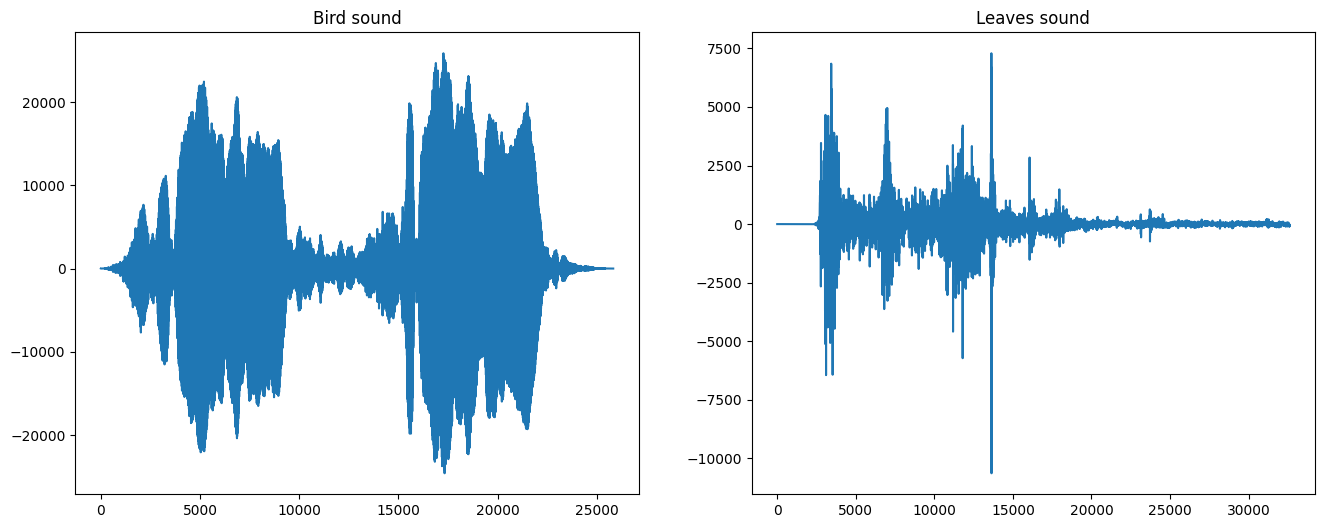

In [48]:
# Import dependencies
import time
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.io.wavfile import read

fs_bird, sound_bird = read('./data/bird.wav')
fs_leaves, sound_leaves = read('./data/leaves.wav')

# Plot sounds in different subplots
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.plot(sound_bird)
plt.title("Bird sound")
plt.subplot(1, 2, 2)
plt.plot(sound_leaves)
plt.title("Leaves sound")
plt.show()

# Play sounds
time.sleep(1)
sd.play(sound_bird, fs_bird)
time.sleep(1)
sd.play(sound_leaves, fs_leaves)
time.sleep(1)

1. Double the amplitude of the second audio signal (leaves) using *numpy*. Then plot the amplified signal using *matplotlib*. (*1 point*)

44100
44100
[ 7  0  0 ... -1 -1  0]
[  0   0   0 ... -61 -72 -61]


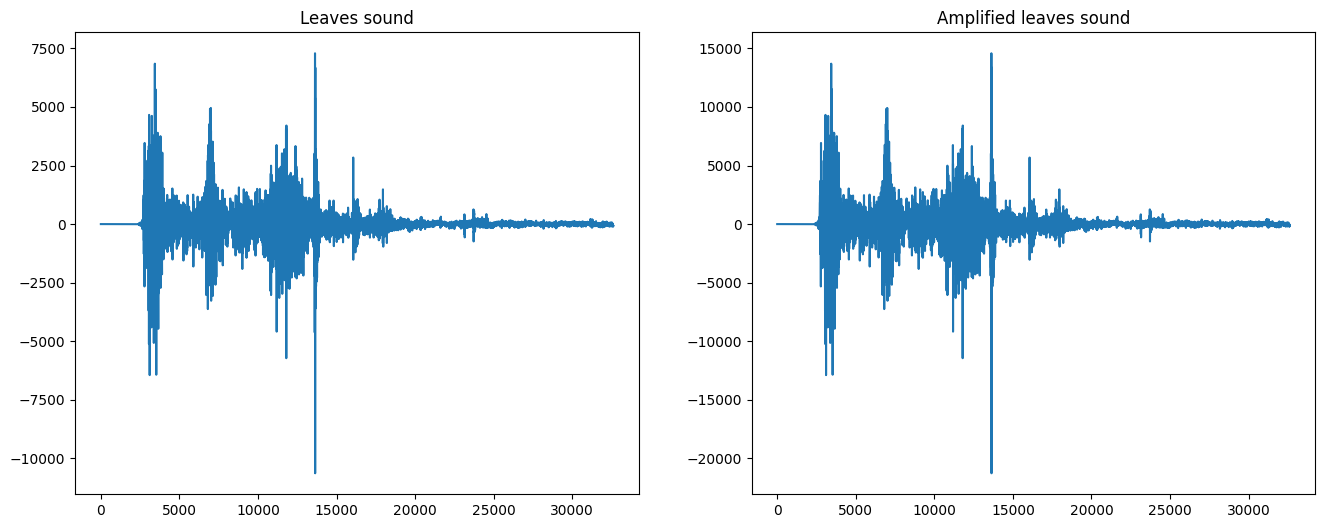

In [49]:
import numpy as np

# just to look at the values inside variables
# fs_* variables store frequency
print(fs_bird)
print(fs_leaves)
# sound_* store the audio data, as a one-dimensional array of samples,
# where each sample represents the amplitude of the audio signal at a specific point in time.
print(sound_bird)
print(sound_leaves)

# Double the amplitude of the leaves audio signal
amplified_sound_leaves = 2 * sound_leaves

# Plot the original and amplified audio signals
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.plot(sound_leaves)
plt.title("Leaves sound")
plt.subplot(1, 2, 2)
plt.plot(amplified_sound_leaves)
plt.title("Amplified leaves sound")
plt.show()

# Play sounds, just curiosity, to check for the difference by ear
time.sleep(1)
sd.play(amplified_sound_leaves, fs_leaves)
time.sleep(1)
sd.play(sound_leaves, fs_leaves)
time.sleep(1)

2. The two sounds don't have the same length (number of samples). Print the length of the two sounds and create a new leaves sound as long as the birds sound. Print again the lenghts to make sure they match. (Use the amplified leaves sound previously created). (*1 point*)

In [50]:
# Print the lengths of the original birds sound and amplified leaves sounds
print("Length of original birds sound:", len(sound_bird))
print("Length of amplified leaves sound:", len(amplified_sound_leaves))

new_sound_leaves = amplified_sound_leaves[:len(sound_bird)]

# Print the lengths of the original birds sound and new (shortened) leaves sounds
print("Length of original birds sound:", len(sound_bird))
print("Length of new, shortened leaves sound:", len(new_sound_leaves))

# Play sounds, just curiosity, to check for the difference by ear
time.sleep(1)
sd.play(new_sound_leaves, fs_leaves)
time.sleep(1)
sd.play(sound_bird, fs_bird)
time.sleep(1)

Length of original birds sound: 25824
Length of amplified leaves sound: 32612
Length of original birds sound: 25824
Length of new, shortened leaves sound: 25824


3. Create a silence period (0 amplitude) of the same duration of the two sounds, using *numpy*. (*1 point*)

In [51]:
# we know that now length of original birds sound and new, shortened leaves sound are equal
# so we will create a silence period base on the length of one of them

sound_bird_length = len(sound_bird)

silence_period = np.zeros(sound_bird_length)
print(len(silence_period))

25824


4. Finally, concatenate the diffent sounds into one. The order should be: silence, birds, silence, leaves, silence (use the amplified and cut leaves sound). Use *numpy* and plot the results. (*2 points*)

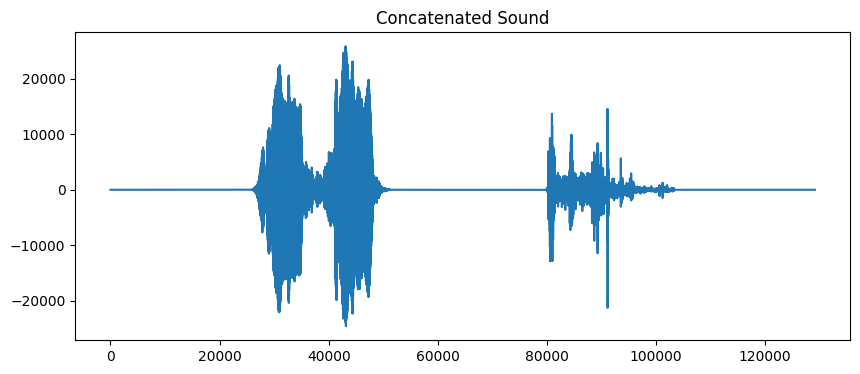

In [52]:

# Concatenate the sounds
concatenated_sound = np.concatenate((silence_period, sound_bird, silence_period, new_sound_leaves, silence_period))

# Plot the concatenated sound
plt.figure(figsize=(10, 4))
plt.plot(concatenated_sound)
plt.title('Concatenated Sound')
plt.show()

<h3 style="text-align:left;">Exercise 2 - Image data<span style="float: right">7 points</span></h3>

In this exercise, you'll work with an image, i.e. an n-dimensional matrix data. First, we load and plot the image:

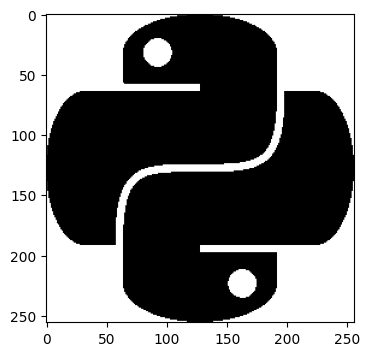

In [53]:
import matplotlib.pyplot as plt
import numpy as np

im = plt.imread('./data/python.bmp')
im = np.array(im)

plt.figure(figsize=(4, 4))
plt.imshow(im)
plt.show()

The image is a 3-dimensional array, where the 1st and 2nd dimensions represent positions on the Y (rows) and X (columns) axes and the 3rd saturation values between 0 and 255 for that specific position, as [red, green, blue].

1. Set the pixels on the 50th to 60th row and and 200th to 210th column to green, and displays the resultant image. The data-type of the array should be an 8-bit unsigned integer. (*1 point*)

**NB!** 
- From the 50th row, up to and including the 60th; From the 200th column, up to and including the 210th.
- Keep in mind that the first dimension is related to the usual Y axis, and the second dimension to the usual X axis.

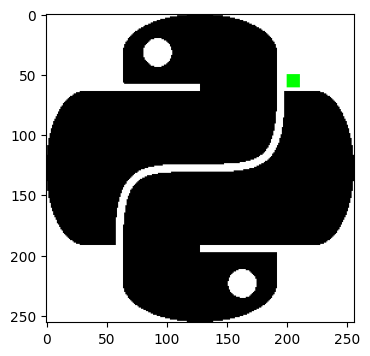

In [54]:

im[50:61, 200:211, :] = [0, 255, 0]  # [red, green, blue] , so we set 255 for green color, we also changing original image here

# Display the image
plt.figure(figsize=(4, 4))
plt.imshow(im)
plt.show()


2. The image created in point 1 will be the one you use in the rest of the exercise. Make a copy of the top half of the image, flip it along the 2nd axis using the appropriate numpy method, and plot the result. (*1 point*)

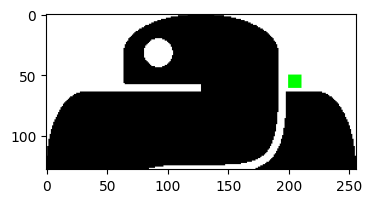

Result:


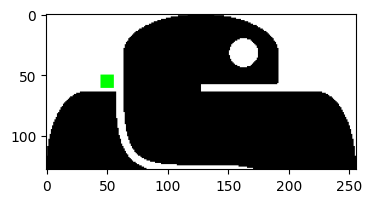

In [55]:
# Select the top half of the image, visualize the result
top_half = im[:im.shape[0] // 2, :, :]
plt.figure(figsize=(4, 4))
plt.imshow(top_half)
plt.show()

# make a copy
top_half_copy = np.copy(top_half)

# Flip the image along the second axis
flipped_image_2nd_axis = np.flip(top_half_copy, axis=1)

# visualize the result
print("Result:")
plt.figure(figsize=(4, 4))
plt.imshow(flipped_image_2nd_axis)
plt.show()


3. Make a copy of the bottom half of your image, combine it together with the first half you flipped in point 2, and display the result. Also plot your original image and check whether it has changed. (*1 point*)

Text(0.5, 1.0, 'Original Image (with green dot)')

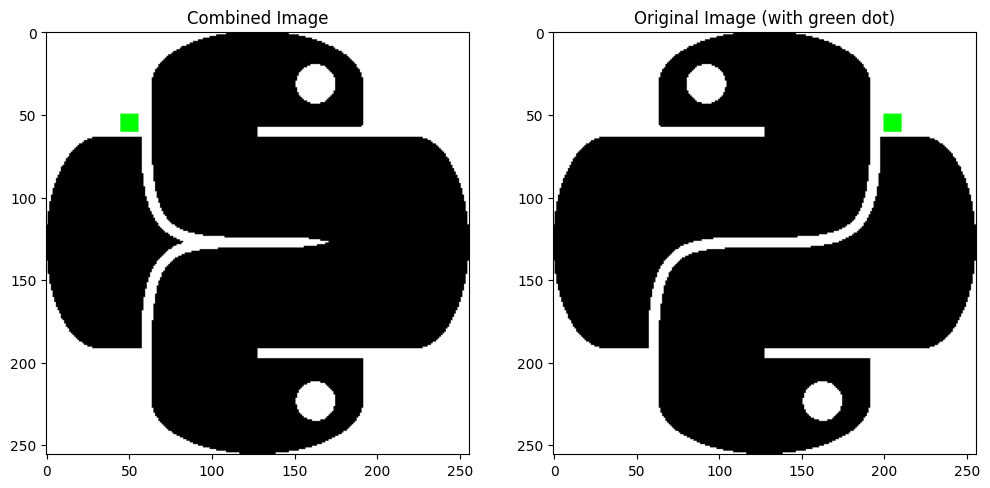

In [56]:
# Get bottom half of the image and copy
bottom_half_copy = np.copy(im[im.shape[0] // 2:, :, :])

# Combine the flipped top half with the copied bottom half
combined_image = np.concatenate([flipped_image_2nd_axis, bottom_half_copy], axis=0)

# Visualize the combined image and original image side by side
plt.figure(figsize=(12, 6))

# Display the combined image
plt.subplot(1, 2, 1)
plt.imshow(combined_image)
plt.title('Combined Image')

# Display the original image
plt.subplot(1, 2, 2)
plt.imshow(im)
plt.title('Original Image (with green dot)')


4. Make a shallow copy (view) of the top half of your image. Change every black pixel ([0, 0, 0]) to a green pixel ([0, 255, 0]). Plot the resulting colored top part, together with the base of your shallow copy and also the original image. (*2 points*)

**Hint**: to test that a consition holds for multiple elements use the *numpy.all* function.

True


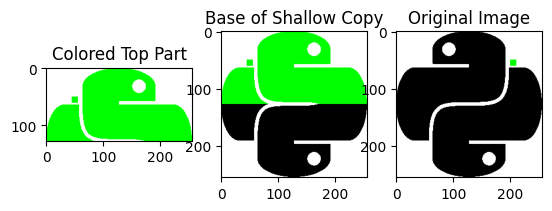

In [58]:
# For this excercise our assumption is that "your image" is combined_image we got in a previous excercise
# Make a shallow copy of the top half of the image
top_half_view = combined_image[:combined_image.shape[0] // 2, :, :]

# Find black pixels and change them to green
black_pixels = np.all(top_half_view == [0, 0, 0], axis=-1)
top_half_view[black_pixels] = [0, 255, 0]

# Visualize
# colored top part of a view
plt.subplot(1, 3, 1)
plt.imshow(top_half_view)
plt.title('Colored Top Part')

# base of the shallow copy
plt.subplot(1, 3, 2)
print(top_half_view.base is combined_image) # to check that the base is what we actually expect
plt.imshow(top_half_view.base)
plt.title('Base of Shallow Copy')

# original image
plt.subplot(1, 3, 3)
plt.imshow(im)
plt.title('Original Image')

plt.show()


5. In point 3, your original image should not have changed, while in point 4, the original image should show the same change as when plotting the base of your shallow copy. Give a brief explanation of why the original image changed in one instance, and not in the other. (*2 points*)

In [59]:
# in point 3 we made a deep copy, so that deep copy points to a newly allocated memory, dep copy points to a new object,
# which is not related to an image we made a copy from

# in point 4 we made a shallow copy, which means nev variable is pointing to the same memory location as the base image,
# and all modifications we do to a shallow copy will be reflected in a base image two.

<h3 style="text-align:left;">Exercise 3 - Tabular data<span style="float: right">3 points</span></h3>

In the following you'll work with tabular data, i.e. data related to multiple observations. The dataset consists of synthetic data on monthly average precipitations in 4 different countries: Switzerland, Italy, France and Germany. Let's first load the dataset and assign the variables:

In [60]:
import numpy as np

precip = np.load("./data/precip.npy", allow_pickle=True)

precip[:, 0]  # 12 data points for Switzerland (one per month)
precip[:, 1]  # 12 data points for Italy (one per month)
precip[:, 2]  # 12 data points for France (one per month)
precip[:, 3]  # 12 data points for Germany (one per month)

array([1.19, 1.23, 2.37, 3.37, 3.55, 2.5 , 2.36, 2.17, 2.38, 1.78, 1.79,
       1.24])

1. Use built-in numpy methods to obtain an array with the maximum precipitation for each country, and the average precipitation *across* the five countries for each month. (*1 point*)

In [64]:

# Maximum precipitation for each country
max_precip_per_country = np.max(precip, axis=0)

# Average precipitation across the five countries for each month
avg_precip_across_countries = np.mean(precip, axis=1)

print("Maximum precipitation for each country:", max_precip_per_country)
print("Average precipitation across the five countries for each month:", avg_precip_across_countries)


Maximum precipitation for each country: [3.05 2.56 2.89 3.55]
Average precipitation across the five countries for each month: [0.7    0.745  1.855  2.8875 2.99   1.965  1.905  1.64   1.85   1.3
 1.3775 0.82  ]


2. Obtain the maximum precipitation of the entire dataset. Next, use a numpy method to find out at which row and column in the dataset you would find this maximum precipitation at. (*2 points*)

In [70]:
## Find the indices of the maximum precipitation
max_value = np.max(precip)
max_indices = np.where(precip == max_value)

# To account for the fact that there could be multiple maximum values and increase readability of the output:
# we decided to combine row and column indices together to get pairs of indices
max_indices_pairs = list(zip(max_indices[0], max_indices[1]))

# Print the result
print("Max value: ", max_value)
print("row and column of the maximum precipitation:", max_indices_pairs)

Max value:  3.55
row and column of the maximum precipitation: [(4, 3)]
